In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [16]:
cycle_df = pd.read_csv('./nyc_cyclist_counts.csv')
cycle_df.head()


,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


In [17]:
x = cycle_df.loc[:, 'HIGH_T':'PRECIP'].to_numpy()
y = cycle_df['BB_COUNT'].to_numpy()

exog, endog = sm.add_constant(x), y
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

<ipython-input-17-3bb92a796310>:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log))


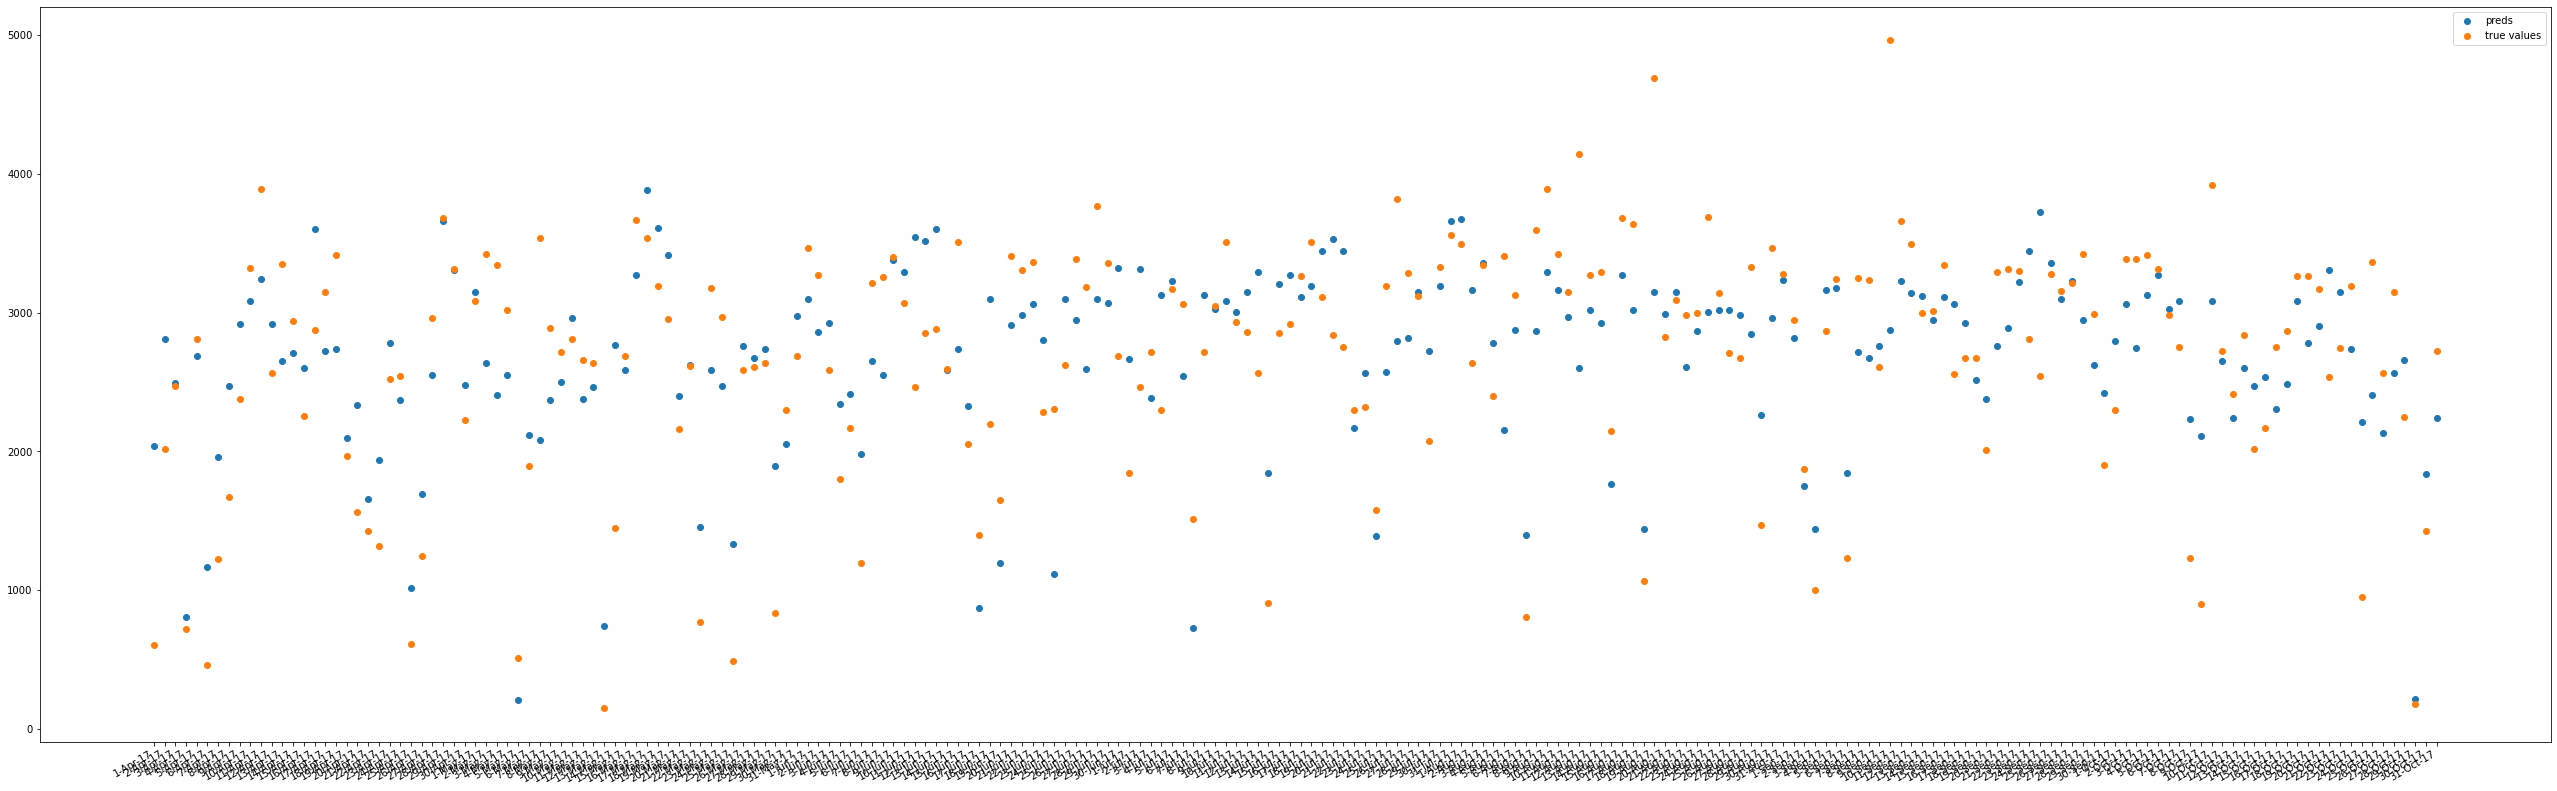

In [56]:
preds = res.predict(exog)
dates = list(cycle_df['Date'])



fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(45)

ax.scatter(dates, preds, label='preds')
ax.scatter(dates, y, label='true values')
ax.legend()
fig.autofmt_xdate()




plt.show()